In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
data = pd.read_csv(url)

print(data.info())


print(data.head())

print("Columns in the dataset:", data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB
None
   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11

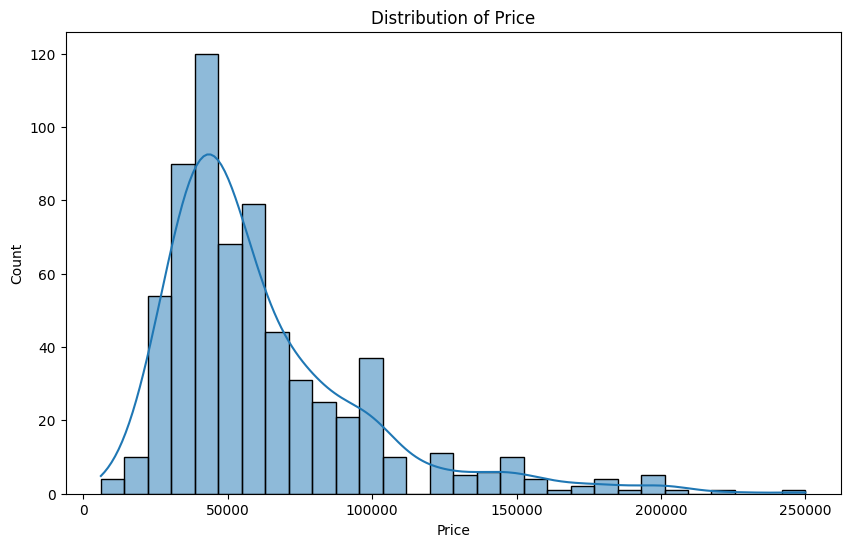

In [2]:

plt.figure(figsize=(10, 6))
sns.histplot(data.get('Price', default=pd.Series(dtype=float)), bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()


In [3]:

data = data.dropna()


In [4]:

X = data.select_dtypes(include=np.number).drop('Price', axis=1)
y = data.get('Price', default=pd.Series(dtype=float))


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 401068215.25011665
R-squared: 0.7205009707940984
